EDA

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns

In [3]:
plt.rc('font', family='NanumGothicBold') 

데이터 불러오기

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data=pd.concat([train, test], axis=0)

In [5]:
data=data.reset_index(drop=True)

In [6]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


출근자 수 칼럼 추가

In [7]:
data['출근자수']=data['본사정원수']-data['본사출장자수']-data['본사휴가자수']-data['현본사소속재택근무자수']

In [8]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0


회사 출근자 수와 구내식당 이용자 수

In [9]:
print('max: ', (data['중식계']/data['출근자수']).max())
print('min: ', (data['중식계']/data['출근자수']).min())
print('mean: ', (data['중식계']/data['출근자수']).mean())
print('median: ', (data['중식계']/data['출근자수']).median())

max:  0.5972034280559314
min:  0.14364896073903002
mean:  0.3764582542741491
median:  0.3719328454584589


In [10]:
print('max: ', (data['석식계']/data['출근자수']).max())
print('min: ', (data['석식계']/data['출근자수']).min())
print('mean: ', (data['석식계']/data['출근자수']).mean())
print('median: ', (data['석식계']/data['출근자수']).median())

max:  0.3802698145025295
min:  0.0
mean:  0.19545991505965818
median:  0.203690036900369


* 실출근자의 37%정도가 중식을, 실출근자의 20% 정도가 석식을 먹는다

중식 및 석식 이용자 수

findfont: Font family ['NanumGothicBold'] not found. Falling back to DejaVu Sans.


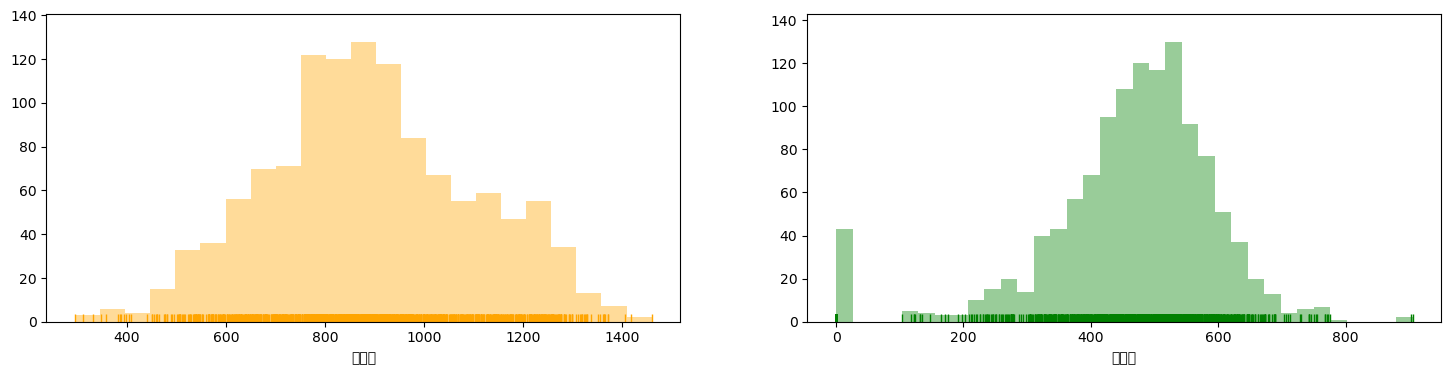

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(data["중식계"], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(data["석식계"], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

* 전반적으로 중식계 > 석식계
* 석식: 0인날 뭐지 ?

날짜

In [12]:
data['일자'] = pd.to_datetime(data['일자'], format='%Y-%m-%d')
data['년도'] = data['일자'].dt.year
data['월'] = data['일자'].dt.month
data['일'] = data['일자'].dt.day

<AxesSubplot:xlabel='년도'>

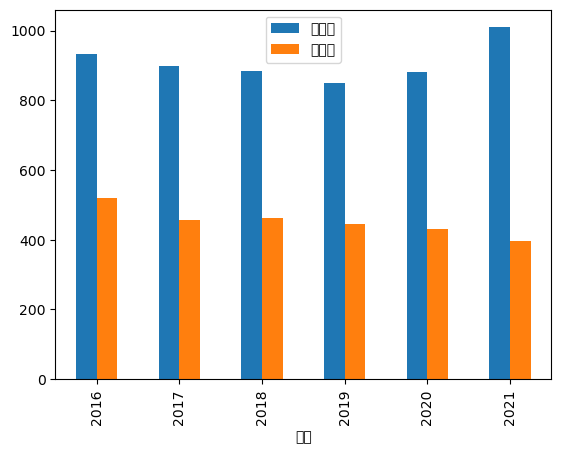

In [13]:
data.groupby('년도').mean()[['중식계','석식계']].plot(kind='bar')

<AxesSubplot:xlabel='월'>

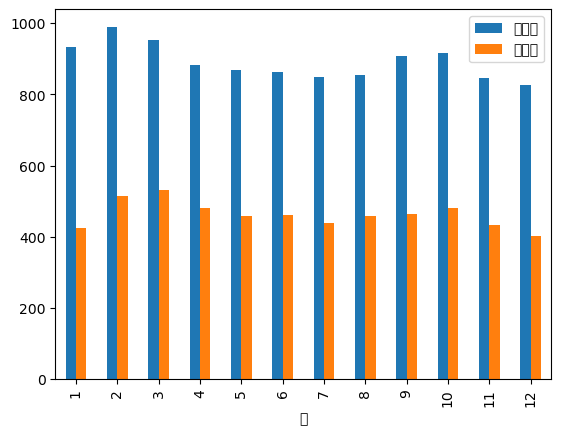

In [14]:
data.groupby('월').mean()[['중식계','석식계']].plot(kind='bar')

<AxesSubplot:xlabel='요일'>

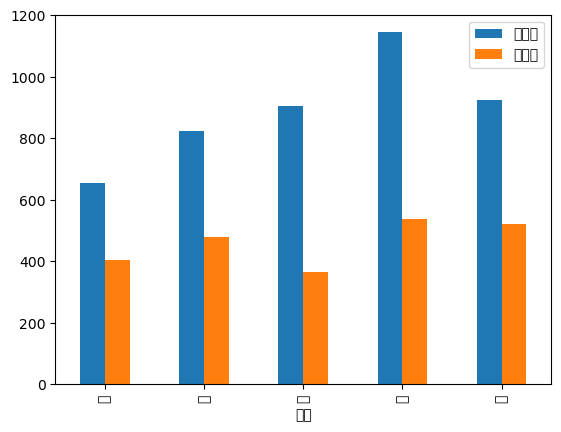

In [15]:
data.groupby('요일').mean()[['중식계','석식계']].plot(kind='bar')

<AxesSubplot:xlabel='일'>

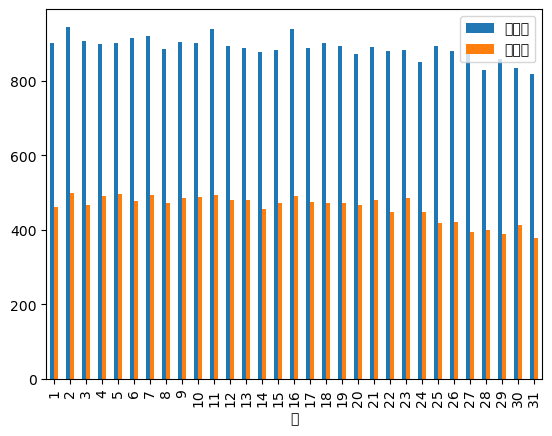

In [16]:
data.groupby('일').mean()[['중식계','석식계']].plot(kind='bar')

* 중식 > 석식
* 년도, 월, 일은 유사함
* 요일
   * (중식): 월, 화, 수, 목, 금
   * (석식): 월, 화, 목, 금, 수 (매월 마지막 주 수요일 자기개발날, 그래서 석식 이용자가 압도적으로 적은 듯)

요일 평균 식계: 중식계와 석식계 요일별 시각화

<AxesSubplot:xlabel='요일', ylabel='석식계'>

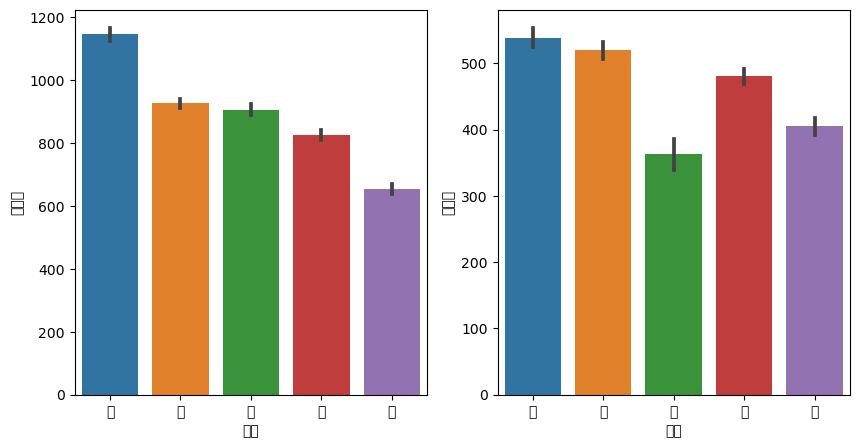

In [17]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='요일', y='중식계', data=data, ax=ax[0])
sns.barplot(x='요일', y='석식계', data=data, ax=ax[1])

석식계 0명인 날

In [18]:
data[data['석식계']== 0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수,년도,월,일
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2414.0,2016,11,30
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2314.0,2016,12,28
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2415.0,2017,1,25
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0,2305.0,2017,2,22
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0,2339.0,2017,3,22
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0,2277.0,2017,4,26
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0,2329.0,2017,5,31
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0,2331.0,2017,6,28
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0,2339.0,2017,7,26
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0,2162.0,2017,9,1


In [19]:
data[data['석식계']== 0]['석식메뉴'].value_counts()

    *                                                       19
                                                             4
    자기계발의날                                                   3
    자기개발의날                                                   3
     *                                                       2
    *  자기계발의날  *                                             2
    *  자기개발의날  *                                             2
      자기계발의날                                                 1
      *자기계발의날*                                               1
      가정의날                                                   1
쌀밥/잡곡밥 (쌀:국내산) 된장찌개  미니함박조림  계란말이  비름나물  포기김치 (김치:국내산)       1
쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국  고추잡채*꽃빵  계란찜  오이무침  포기김치 (김치:국내산)      1
      *                                                      1
   *  자기개발의날  *                                              1
 ＜자기 계발의 날＞                                                  1
Name: 석식메뉴, dtype: int64

* 대부분 자기개발의 날
* 저녁 메뉴가 있는데 0명인 날은 2일

EDA: 요일별 출근자 수와 중식계 scatterplot

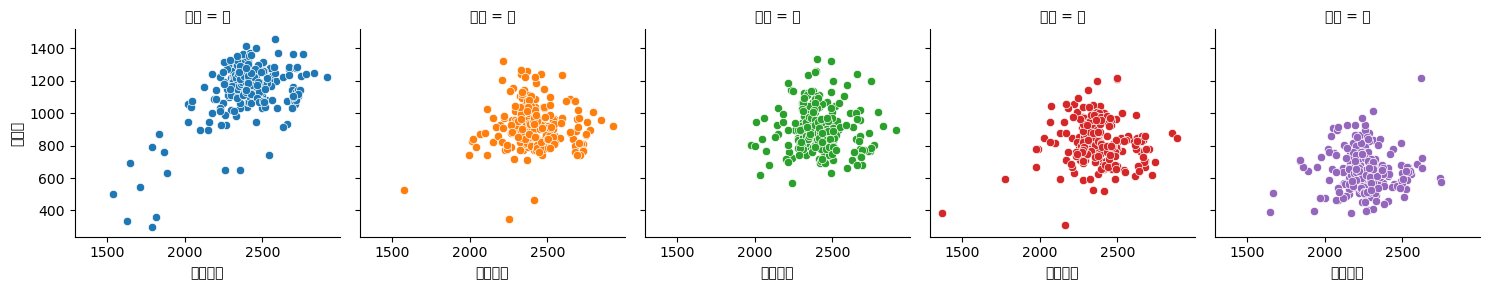

In [20]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '출근자수', '중식계')

요일별 야근자수와 석식계의 scatterplot 

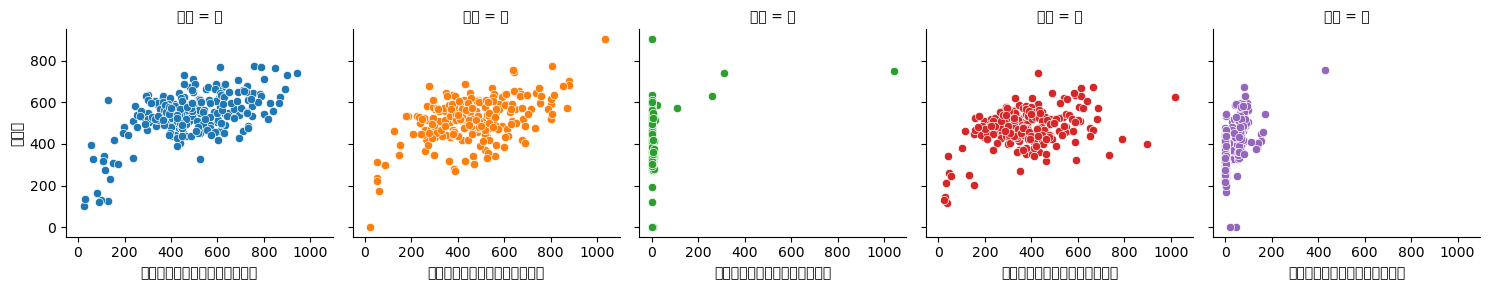

In [21]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '본사시간외근무명령서승인건수', '석식계')

요일별 중식계와 석식계의 scatterplot

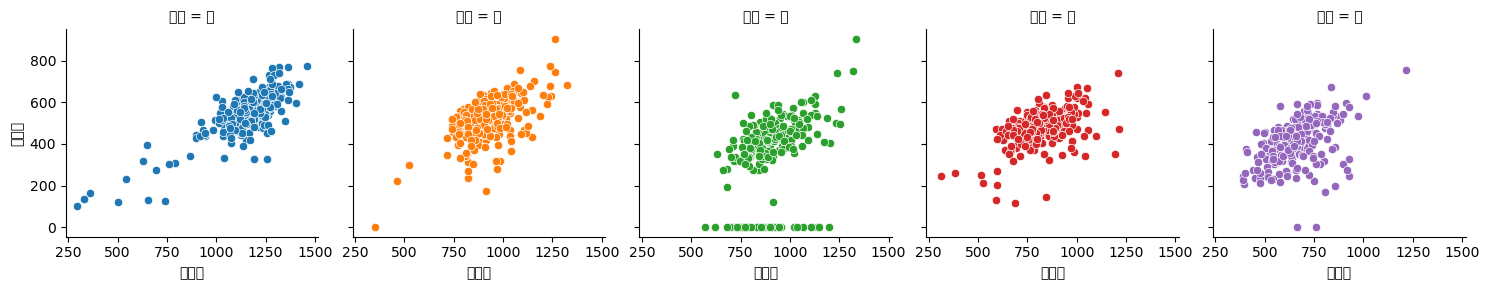

In [22]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '중식계', '석식계')

중식계 시각화

<AxesSubplot:>

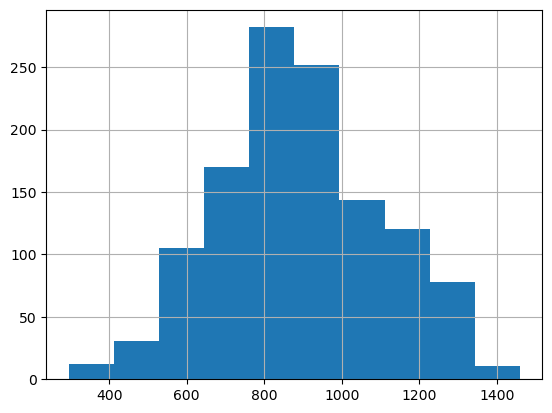

In [23]:
data['중식계'].hist()

석식계 시각화

<AxesSubplot:>

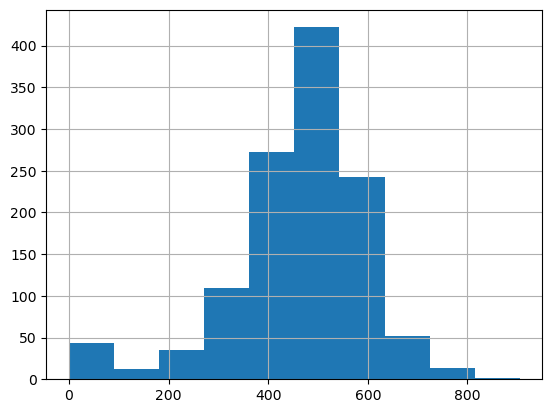

In [24]:
data['석식계'].hist()

메뉴

In [25]:
tmp = train['석식메뉴'][0].split(' ') 
tmp2 = ' '.join(tmp).split() 
print(tmp2)

['쌀밥/잡곡밥', '(쌀,현미흑미:국내산)', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치', '(김치:국내산)']


In [26]:
[word for word in tmp2 if not word.startswith('(')]

['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치']

In [27]:
train2 = train[:]

In [28]:
lunch = []
dinner = []

for i in range(len(train)):
    menu1 = train['중식메뉴'][i]
    tmp1 = menu1.split(' ') # 공백으로 문자열 구분 
    tmp1 = ' '.join(tmp1).split()    # 빈 원소 삭제

    menu2 = train['석식메뉴'][i]
    tmp2 = menu2.split(' ') # 공백으로 문자열 구분 
    tmp2 = ' '.join(tmp2).split()    # 빈 원소 삭제

    word1 = [word for word in tmp1 if not word.startswith('(')]
    word2 = [word for word in tmp2 if not word.startswith('(')]

    lunch.append(word1)
    dinner.append(word2)

In [29]:
lunch[:10]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치']]

In [30]:
dinner[:10]

[['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치'],
 ['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치'],
 ['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치'],
 ['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치'],
 ['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치'],
 ['참치회덮밥', '맑은국', '군만두', '과일샐러드', '락교', '포기김치'],
 ['쌀밥/잡곡밥', '김치콩나물국', '미니함박', '어묵볶음', '물파래무침', '깍두기'],
 ['쌀밥/잡곡밥', '홍합미역국', '등갈비김치찜', '임연수구이', '브로컬리초장', '포기김치'],
 ['쌀밥/잡곡밥', '된장찌개', '쇠불고기', '해파리겨자채', '봄동무침', '포기김치'],
 ['볶음밥*자장소스', '맑은국', '새우또띠아', '쨔샤이무침', '요플레', '포기김치']]

상관관계

In [31]:
from sklearn.preprocessing import LabelEncoder

items = train['요일'].unique()
encoder = LabelEncoder()
encoder.fit(train['요일'])
labels = encoder.transform(items)

print(labels)
print(encoder.classes_)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data['dow'] = encoder.transform(data['요일'])

<AxesSubplot:>

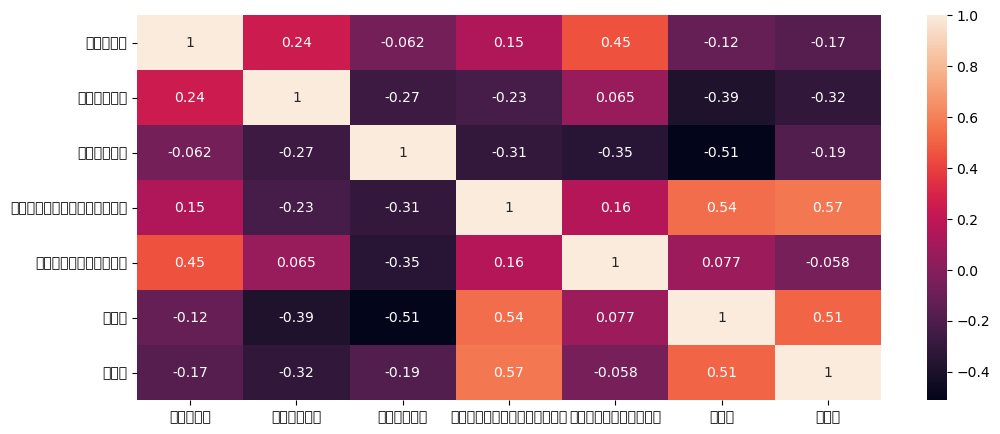

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(train.corr(), annot=True)